### Analysis of MTA Subway by Rosania Pinto ###


MTA Subway Customer Metrics 2015-2024

Question 3: Is there a difference in service time between off-peak and peak service periods? What influence does the number of passengers have with train punctuality?

There is no difference in service time between offpeak and peak service. From the graphs below, the average customer journey time for offpeak and peak service was evenly split for both. Peak service is slight more than 3.0 compared to offpeak service in comparing with number of passengers. Besides that, nothing influences the service time between offpeak and peak service.

According to Pearson's correlation coefficient for Number of Passengers and Customer Journey Time, there is no correlation. Customer Journey Time was -0.31 which is closer to -1 than 0. Hence, it's a very weak negative correlation. It looks that there's no influence on the number of passengers and train punctuality.


In [17]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
MTA_1 = pd.read_csv('../data/MTA_Subway_Customer_Metrics__2015-2019.csv')
MTA_2 = pd.read_csv('../data/MTA_Subway_Customer_Metrics_2020-2024.csv')

In [19]:
merged_mta = pd.concat([MTA_1, MTA_2])

In [20]:
merged_mta.head()

,month,division,line,period,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance
0,2015-01-01,A DIVISION,1,peak,5170116.8,1.371438,0.825562,7090492.655,4268251.636,580364.0,0.112254,0.887746
1,2015-01-01,A DIVISION,1,offpeak,5442987.9,0.913304,0.667314,4971100.611,3632181.629,488584.7,0.089764,0.910236
2,2015-01-01,A DIVISION,2,offpeak,4647297.0,1.084853,1.258279,5041633.115,5847597.552,812798.4,0.174897,0.825103
3,2015-01-01,A DIVISION,2,peak,4719248.8,1.099684,1.419205,5189680.783,6697579.942,839705.4,0.177932,0.822068
4,2015-01-01,A DIVISION,3,offpeak,3602657.1,0.686007,0.856340,2471447.105,3085097.627,368404.9,0.102259,0.897741


In [21]:
merged_mta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4904 entries, 0 to 2855
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   month                              4904 non-null   object 
 1   division                           4904 non-null   object 
 2   line                               4904 non-null   object 
 3   period                             4904 non-null   object 
 4   num_passengers                     4904 non-null   float64
 5   additional platform time           4904 non-null   float64
 6   additional train time              4904 non-null   float64
 7   total_apt                          4904 non-null   float64
 8   total_att                          4904 non-null   float64
 9   over_five_mins                     4904 non-null   float64
 10  over_five_mins_perc                4904 non-null   float64
 11  customer journey time performance  4904 non-null   float64
dt

In [22]:
merged_mta.describe()

,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance
count,4.904000e+03,4904.000000,4904.000000,4.904000e+03,4.904000e+03,4.904000e+03,4904.000000,4904.000000
mean,3.025368e+06,1.216647,0.582427,3.820950e+06,2.530806e+06,5.101031e+05,0.154659,0.845341
std,2.001735e+06,0.432453,0.660826,2.645809e+06,3.215245e+06,3.975647e+05,0.065932,0.065932
min,3.017300e+03,-0.431496,-2.213688,-7.396448e+03,-3.060992e+06,0.000000e+00,0.000000,0.619272
25%,1.449064e+06,0.948721,0.152835,1.699487e+06,2.176745e+05,2.023312e+05,0.110594,0.796599
50%,2.819480e+06,1.195069,0.518339,3.704139e+06,1.438770e+06,4.501899e+05,0.157206,0.842794
75%,4.378101e+06,1.475829,0.939098,5.582262e+06,3.556795e+06,7.423213e+05,0.203401,0.889406
max,1.018307e+07,3.506892,3.048787,1.858170e+07,1.879770e+07,2.326756e+06,0.380728,1.000000


In [ ]:
#counting Period rows in dataset for Peak and Offpeak

peak_count = merged_mta["period"].str.contains(r'\bpeak\b', case=False, regex=True, na=False).sum()
offpeak_count = merged_mta["period"].str.contains(r'\boffpeak\b', case=False, regex=True, na=False).sum()

print(f"Peak count: {peak_count}")
print(f"Offpeak count: {offpeak_count}")


Peak count: 2452
Offpeak count: 2452


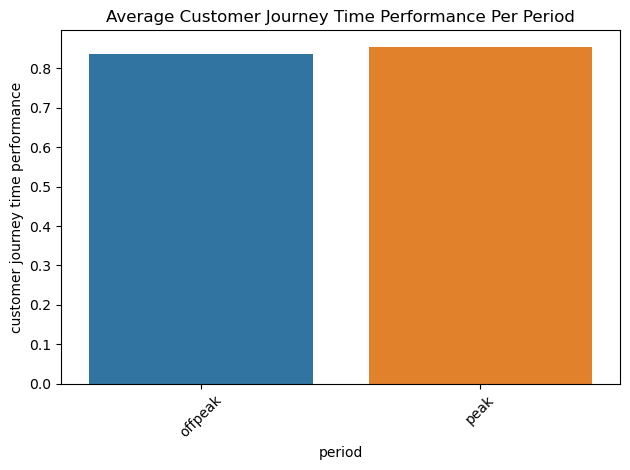

In [24]:
#Graph of Customer Journey Time and Period
avg_per_period = merged_mta.groupby("period", observed=True)["customer journey time performance"].mean().reset_index()

sns.barplot(
    data=avg_per_period,
    x="period",
    y="customer journey time performance",
    hue="period",           # assign hue
    palette="tab10",        # or any other palette
    legend=False            # hide legend since it's redundant
)

plt.title("Average Customer Journey Time Performance Per Period")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


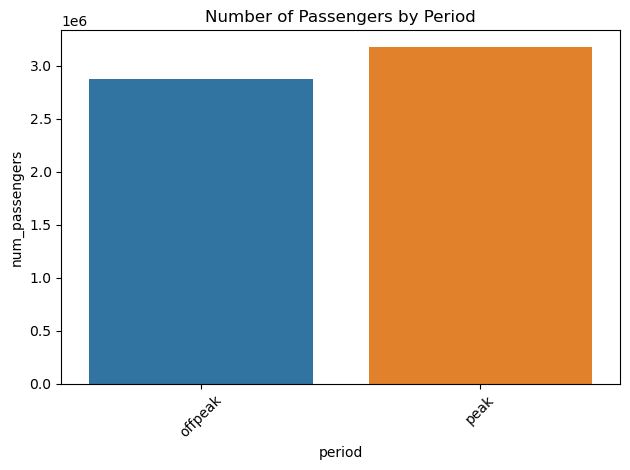

In [25]:
#Graph of Number of Passengers and Period
avg_per_period = merged_mta.groupby("period", observed=True)["num_passengers"].mean().reset_index()

sns.barplot(
    data=avg_per_period,
    x="period",
    y="num_passengers",
    hue="period",           # assign hue
    palette="tab10",        # or any other palette
    legend=False            # hide legend since it's redundant
)

plt.title("Number of Passengers by Period")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


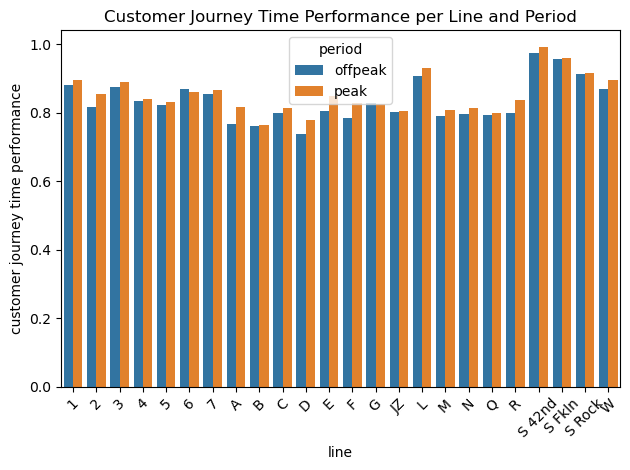

In [26]:
##Graph of Customer Journey Time and Period by Subway Line
avg_per_line_period = merged_mta.groupby(["line", "period"], observed=True)["customer journey time performance"].mean().reset_index()

sns.barplot(data=avg_per_line_period, x="line", y="customer journey time performance", hue="period")
plt.title("Customer Journey Time Performance per Line and Period")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


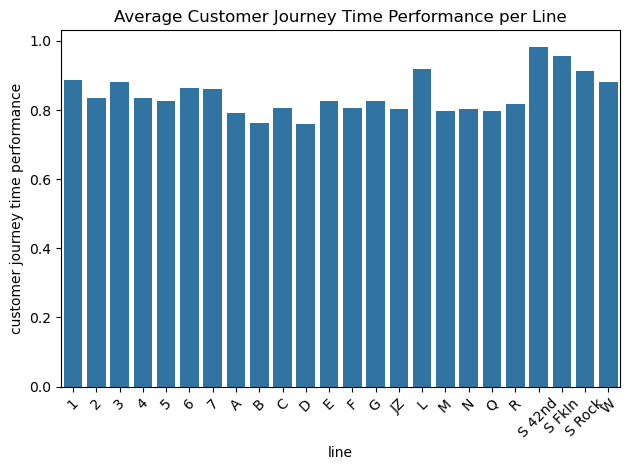

In [27]:
##Graph of Customer Journey Time and Subway Line
avg_per_line = merged_mta.groupby("line", observed=True)["customer journey time performance"].mean().reset_index()

sns.barplot(data=avg_per_line, x="line", y="customer journey time performance")
plt.title("Average Customer Journey Time Performance per Line")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
# Looking at the relationship between customer journey time performance and number of passenger
# Pearson's correlation coefficient bewteen number of passengers and customer journey time
corr = merged_mta[['customer journey time performance', 'num_passengers']].corr()
corr

,customer journey time performance,num_passengers
customer journey time performance,1.000000,-0.319832
num_passengers,-0.319832,1.000000


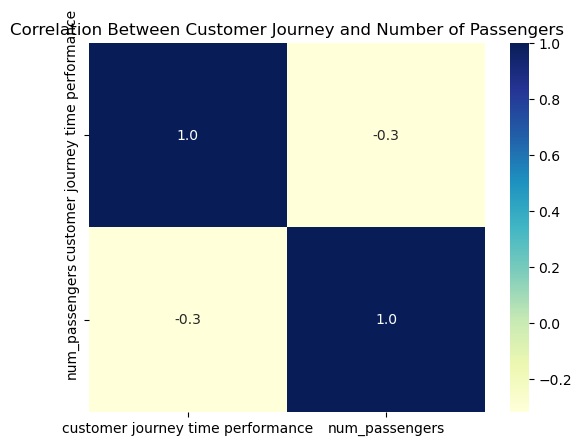

In [30]:
# heatmap of the correlation
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title("Correlation Between Customer Journey and Number of Passengers")
plt.show()

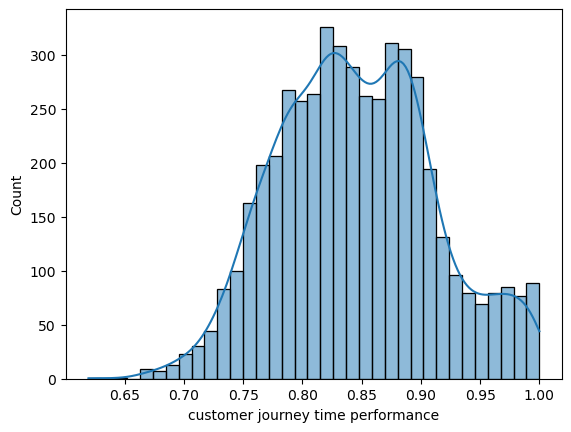

In [ ]:
# Histogram of customer journey time performance
sns.histplot(merged_mta, x="customer journey time performance", kde=True)
plt.show()

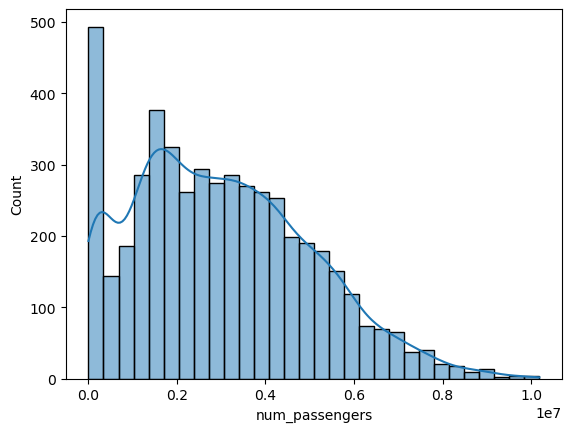

In [ ]:
# Histogram of number of passengers
sns.histplot(merged_mta, x="num_passengers", kde=True)
plt.show()

In [33]:
# Change the month column to datetime type for easier grouping
merged_mta['month'] = pd.to_datetime(merged_mta['month'])

# A new column to hold the year
merged_mta['year'] = merged_mta['month'].dt.year

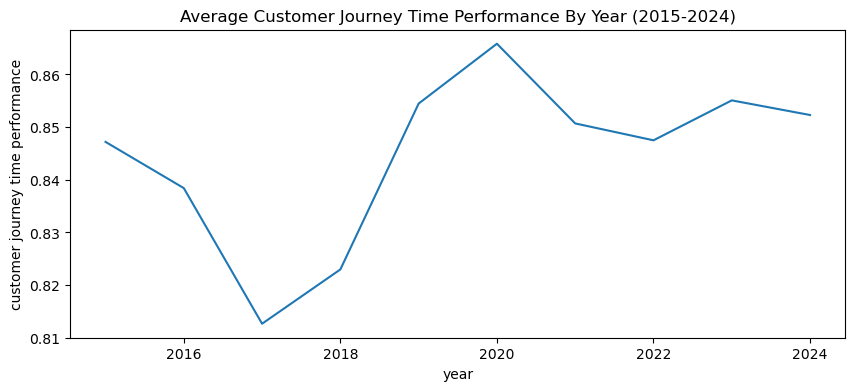

In [34]:
# Average Customer Journey Time By Month
plt.figure(figsize=(10, 4))
mta_monthly = merged_mta.groupby('year').mean(numeric_only=True).reset_index()

sns.lineplot(data=mta_monthly, x="year", y="customer journey time performance")
plt.title("Average Customer Journey Time Performance By Year (2015-2024)")
plt.show()

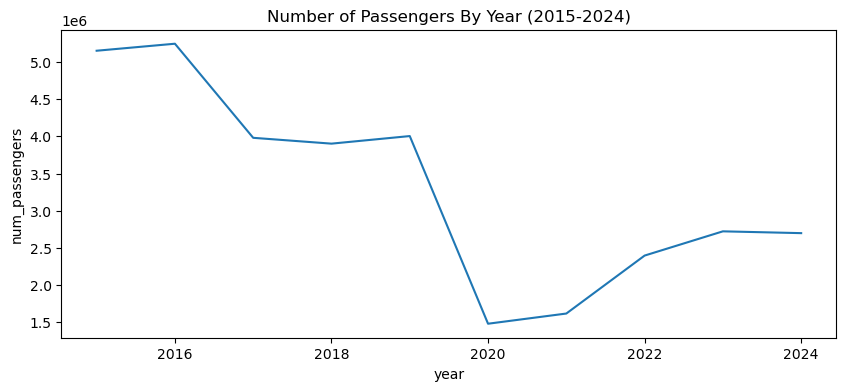

In [35]:
# Number of Passengers By Year
plt.figure(figsize=(10, 4))
mta_monthly = merged_mta.groupby('year').mean(numeric_only=True).reset_index()

sns.lineplot(data=mta_monthly, x="year", y="num_passengers")
plt.title("Number of Passengers By Year (2015-2024)")
plt.show()